# Comparing the background with `CLASS`

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import lya.cosmology as cosmology

In [14]:
import inspect

In [15]:
# import classy module
from classy import Class

In [16]:
plt.rcParams.update({"figure.dpi": 150})

In [17]:
cosmo = cosmology.Cosmology()

In [18]:
class_cosmo = Class()
class_cosmo.set(
    {
        'T_cmb': cosmo.T_cmb,
        'omega_b': cosmo.omega_b,
        'omega_cdm': cosmo.omega_dm,
        'h': cosmo.h,
    }
)

True

In [19]:
class_cosmo.compute()

In [20]:
class_cosmo_bg = class_cosmo.get_background()

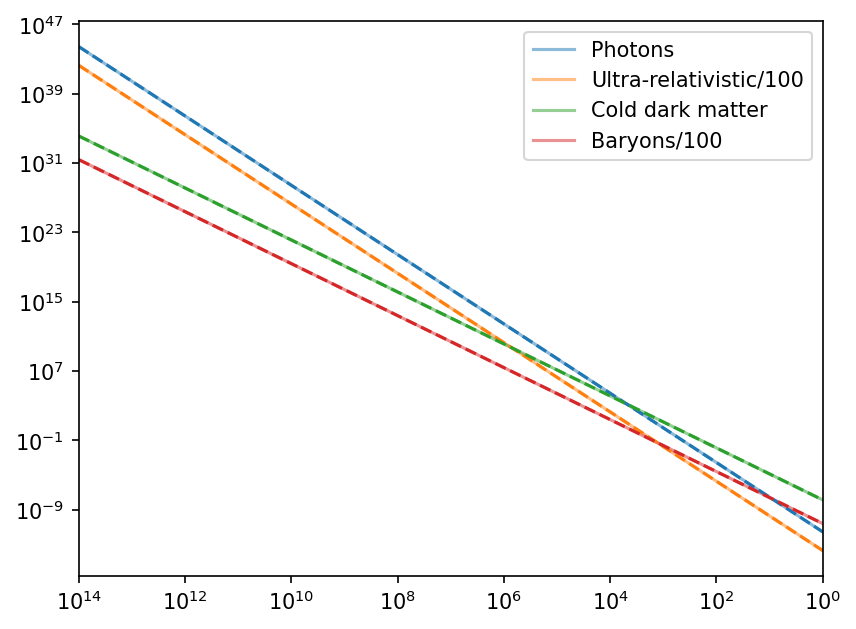

In [24]:
plt.loglog(1. + class_cosmo_bg['z'], class_cosmo_bg['(.)rho_g'], label='Photons', alpha=0.5)
plt.loglog(1. + class_cosmo_bg['z'], class_cosmo_bg['(.)rho_ur']/100., label='Ultra-relativistic/100', alpha=0.5)
plt.loglog(1. + class_cosmo_bg['z'], class_cosmo_bg['(.)rho_cdm'], label='Cold dark matter', alpha=0.5)
plt.loglog(1. + class_cosmo_bg['z'], class_cosmo_bg['(.)rho_b']/100., label='Baryons/100', alpha=0.5)


plt.loglog(1. + class_cosmo_bg['z'], cosmo.Omega_g0*((1. + class_cosmo_bg['z'])**4)*class_cosmo_bg['(.)rho_crit'][-1], color='tab:blue', ls='dashed')
plt.loglog(1. + class_cosmo_bg['z'], cosmo.Omega_nu0*((1. + class_cosmo_bg['z'])**4)*class_cosmo_bg['(.)rho_crit'][-1]/100., color='tab:orange', ls='dashed')
plt.loglog(1. + class_cosmo_bg['z'], cosmo.Omega_dm0*((1. + class_cosmo_bg['z'])**3)*class_cosmo_bg['(.)rho_crit'][-1], color='tab:green', ls='dashed')
plt.loglog(1. + class_cosmo_bg['z'], cosmo.Omega_b0*((1. + class_cosmo_bg['z'])**3)*class_cosmo_bg['(.)rho_crit'][-1]/100., color='tab:red', ls='dashed')


plt.xlim(1. + class_cosmo_bg['z'][0], 1. + class_cosmo_bg['z'][-1])
plt.legend()
plt.show()

In [22]:
class_cosmo_bg['(.)rho_crit'][-1]

5.1161831484105304e-08

In [24]:
class_cosmo_bg['H [1/Mpc]'][-1]**2

5.1161831484105304e-08

In [26]:
cosmo.rho_crit0_class()

5.1161831484105304e-08